## Katz Centrality

### A Problem with Eigenvector Centrality

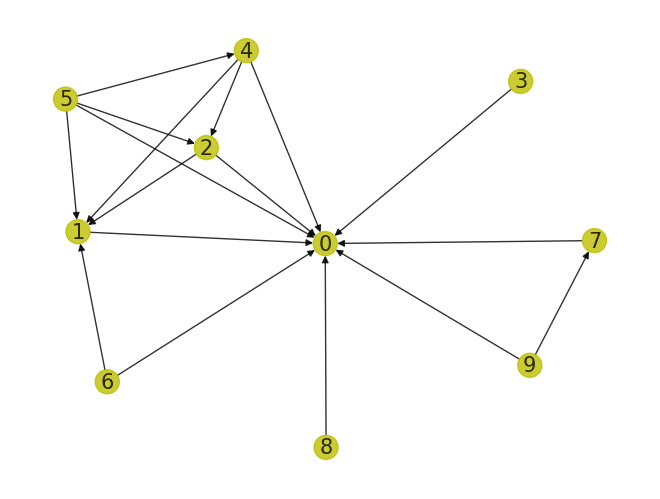

In [36]:
import networkx as nx
from matplotlib import pyplot as plt
G = nx.DiGraph()
G.add_edges_from([(1,0),
        (2,0),(2,1),
        (3,0),
        (4,0),(4,1),(4,2),
        (5,0),(5,1),(5,2),(5,4),
        (6,0),(6,1),
        (7,0),
        (8,0),
        (9,0),(9,7)])
colormap = []
[colormap.append('y') for nodes in G.nodes()]
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf(); plt.ion()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Consider the adjacency matrix

In [37]:
A = nx.linalg.adjacency_matrix(G).toarray()
print(A)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]]


Column 5 (the sixth column) is all zeroes, which means that the eigenvector centrality for node 5 is zero. That doesn't seem right. 

Eigenvector centrality for vertex 6, 3, 9, and 8 is also zero.

Eigenvector centrality for vertex 4 depends on vertex 5, which is zero, so vertex 4's centrality is zero. Likewise for vertex 1 and 7. And therefore for vertex 2 and vertex 0. 

Eigenvector centrality for all nodes in this graph is zero. Uggh!

---

#### Katz Centrality

Compute Katz centrality

In [38]:
x: dict = nx.katz_centrality(G)
for key in sorted(x.keys()):
    print(key,x[key])


0 0.5145525997929234
1 0.371112731366198
2 0.3137990251244581
3 0.2593380372929406
4 0.2852718410222347
5 0.2593380372929406
6 0.2593380372929406
7 0.2852718410222347
8 0.2593380372929406
9 0.2593380372929406


That seems to fix the problem of having centrality be zero for all nodes, but there is still another problem. Let's modify the network by having vertex 0 point to some "lone" vertices.

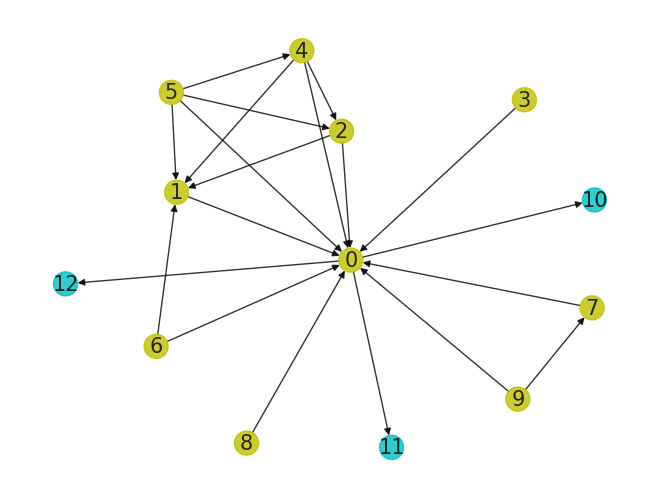

In [39]:
G = nx.DiGraph()
G.add_edges_from([(1,0),
        (2,0),(2,1),
        (3,0),
        (4,0),(4,1),(4,2),
        (5,0),(5,1),(5,2),(5,4),
        (6,0),(6,1),
        (7,0),
        (8,0),
        (9,0),(9,7),
        (0,11),(0,12),(0,10)])
colormap = []
[colormap.append('y') for nodes in G.nodes()]
colormap[10] = 'c'
colormap[11] = 'c'
colormap[12] = 'c'
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf(); plt.ion()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Print out the degree matrix for this graph, which will be useful later on.

In [44]:
import numpy as np
degree_matrix = np.zeros((len(G), len(G)), dtype=int)
for i, node in enumerate(G.nodes()):
    degree_matrix[i, i] = int(dict(G.out_degree())[node])
print(degree_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


Compute Katz centrality for this graph

In [5]:
x: dict = nx.katz_centrality(G)
for key in sorted(x.keys()):
    print(key,x[key])

0 0.4530773919538188
1 0.3267747330708708
2 0.2763084745043701
3 0.22835411116063647
4 0.25118952227670016
5 0.22835411116063647
6 0.22835411116063647
7 0.25118952227670016
8 0.22835411116063647
9 0.22835411116063647
10 0.27366185035601837
11 0.27366185035601837
12 0.27366185035601837


Katz centrality for vertices 10, 11, and 12 is the third highest in the graph. Why? Because they are pointed to by vertex 0, which is the vertex with highest centrality.  But it doesn't seem right that these three vertices have high centrality. 

---

#### Page Rank

Newman (Network Analysis, second edition, section 7.1.4) sets up the Page Rank algorithm as follows. 
Fix the problem with Katz centrality by splitting vertex 1's centrality equally among its children.

$$ x_i = \alpha \sum_{j=1}^n \tilde{A}_{ij}\frac{x_j}{k_j^{\rm out}} + \beta $$ 

I've introduced some new notation, replacing the normal adjacency matrix $A$ with $\tilde{A}$. The reason for this is because Newman and others define the adjacency matrix for a directed graph the opposite to the way networkx does. I used the networkx definition in class. The adjacency matrix I've been using says 

$(i,j) \in E \Rightarrow A_{ij} = 1 $$

that is, if there's an edge from vertex $i$ to vertex $j$ in the edge set then the $i^{\rm th}$ row and $j^{\rm th}$ column is one. But Newman has it the opposite:

$(i,j) \in E \Rightarrow \tilde{A}_{ji} = 1.$$

Notice the swap in the order of the subscripts nexts to $\tilde{A}$.

Let's consider what this is saying. 

  - We are talking about the centrality for node $j$.
  - $\tilde{A}_{ij}$ is one only if node $j$ points to node node $i$.
  - Which means that node $i$ "collects" its centrality from the nodes that point to it.
  - The numerator $k_j^{\rm out}$ says that node $i$ doesn't give all its centrality to each child, but rather gives each child an equal portion; i.e., centrality is divided among node $i$'s children equally.
  - Node $i$'s centrality is the sum of the centrality that the nodes pointing to it allocate across all of there children, scaled by $\alpha$ and added to a constant $\beta$.

We'll ground the discussion of Page Rank using the following directed graph.

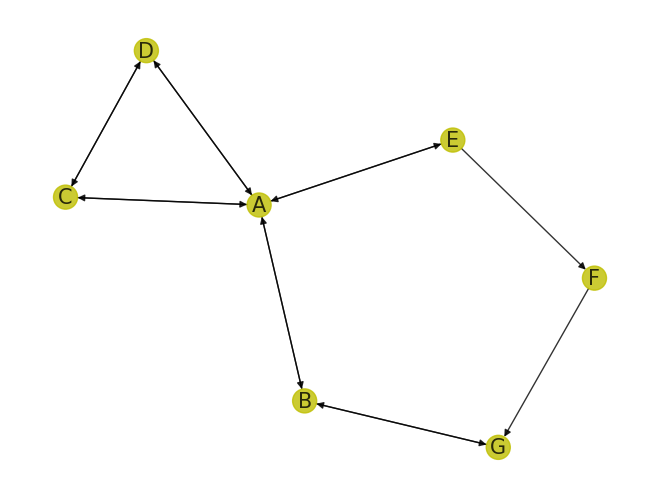

In [6]:
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D','E','F','G'])
G.add_edges_from({('A','C'),('C','A'),
                  ('A','D'),('D','A'),
                  ('D','C'),('C','D'),
                  ('A','E'),('E','A'),
                  ('A','B'), ('B','A'),
                  ('B','G'), ('G','B'),
                  ('E','F'),('F','G')})
colormap = []
[colormap.append('y') for nodes in G.nodes()]
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

__Matrix Form__

We can compute a convenient matrix form by moving the denominator so that it is under the adjacency matrix value instead of under $x_j$
$$ x_i = \alpha \sum_{j=1}^n \frac{\tilde{A}_{ij}}{k_j^{\rm out}} x_j + \beta $$ 

Recall that the degree matrix was defined in class as a diagonal matrix (all zeroes except for on the diagonal) with diagonal entries equal to the degree of each node. We can compute degree from the adjacency matrix. Since we are interested in out degree, we'll sum across rows.

In [7]:
A = nx.linalg.adjacency_matrix(G).toarray() # get adjacency matrix as sparse array and turn it into a regulare numpy array
out_degrees = A.sum(axis = 0) # Do row sum
print(out_degrees)

[4 2 2 2 1 1 2]


We could have done this with $\tilde{A}$ by noting that $\tilde{A}=A^T$ and the taking the column sum.

In [8]:
import numpy as np
A = nx.linalg.adjacency_matrix(G).toarray() # get adjacency matrix as sparse array and turn it into a regular numpy array
A_tilde = np.transpose(A)
print(A_tilde)
out_degrees = A_tilde.sum(axis = 0) # Do column sum
print(out_degrees)

[[0 1 1 1 1 0 0]
 [1 0 0 0 0 0 1]
 [1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 1 0]]
[4 2 2 2 2 1 1]


I the network above, nodes $E$ and $F$ have out degree of one since they only point to one other node. Those nodes are in the third-to-last and second-to-last elements of the out_degrees list above. Now compute the degree matrix.

Let's look at the degree matrix and, while we're at it, look at its inverse.

In [9]:
import numpy as np
D = np.diag(out_degrees)
print(D)
print(np.linalg.inv(D))

[[4 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
[[0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]]


Taking the inverse of a diagonal matrix just inverts the diagonal elements. This means that each diagonal element of the inverse is $1/k_i^{\rm out}$. If we multiply the adjacency matrix by the inverse of the degree matrix, we effectually compute $\tilde{A}_{ij}/k_j^{\rm out}$. Let's compute it, $\tilde{A}D^{-1}$

In [10]:
M = A_tilde@np.linalg.inv(D)
print(M)

[[0.   0.5  0.5  0.5  0.5  0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   1.  ]
 [0.25 0.   0.   0.5  0.   0.   0.  ]
 [0.25 0.   0.5  0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.   1.   0.  ]]


Let's interpret. Row $i$ and column $j$ of matrix $M$ should be the $i^{\rm th}$ row and $j^{\rm th}$ column $\tilde{A}$ divided by the outdegree of node $j$. For row 1 and column 2 we have 0.5, which is  the $i^{\rm th}$ row and $j^{\rm th}$ column $\tilde{A}$ (node "B" points to node "A") divided by the outdegree of node $j$ (which is the out degree of node "B") which is 2.  Notice how the values in each column of $\tilde{A}D^{-1}$ sum to 1. This means that the Page Rank of node $j$ get evenly distributed to all ov the nodes that node $j$ points to.

The Page Rank value for each node is a representation of node centrality. It is computed by solving

$$ x = \alpha \tilde{A}D^{-1} x + \beta {\mathbf 1}$$

to get

$$ x = \beta(I - \alpha \tilde{A}D^{-1}){\mathbf 1}.$$

For reasons that will become apparent when we solve for PageRank a different way, set $\beta = (1-\alpha)/n$ where $n$ is the number of nodes in the graph. 

Let's solve and then compare with the value given by networkx's built in PageRank solution.

In [11]:
num_nodes = len(G.nodes)
alpha = 0.85
beta = (1-alpha)/num_nodes
x = beta*np.linalg.inv(np.eye(num_nodes,num_nodes) - alpha*A_tilde@np.linalg.inv(D))@np.ones(num_nodes)
print(x)
x: dict = nx.pagerank(G,tol = 1e-10)
for key in sorted(x.keys()):
    print(key,"%.3f"%x[key])


[0.25141394 0.20592615 0.13018093 0.13018093 0.07485403 0.05324154
 0.15420249]
A 0.251
B 0.206
C 0.130
D 0.130
E 0.075
F 0.053
G 0.154


They match! We've successfully solved Page Rank as a linear algebra problem. But that's not how it's done in practice. Stated another way, solving the matrix problem is too hard for something as bit as the web, so we need a way to solve page rank more effectively.

---

#### Random Walks and PageRank

This portion of the notebook is based on [Lecture 4.2](https://www.youtube.com/watch?v=rK2ZBmQHVVs) of the Stanford Machine Learning Course

The key for solving page rank is based on interpreting the equation

$$ x_i = \alpha \sum_{j=1}^n \frac{\tilde{A}_{ij}}{k_j^{\rm out}} x_j + \beta $$ 

in a new way. We'll begin by looking at a more simple version of the equation above by getting rid of the $\alpha$ and the $\beta$

$$ x_i = \sum_{j=1}^n \frac{\tilde{A}_{ij}}{k_j^{\rm out}} x_j $$ 



Suppose that we think of this graph above as network of websites, and an edge from one node to another represents a link from the first node to the second. Suppose we surfe this network in random orders, starting at node "A", which is indicated by the cyan color.

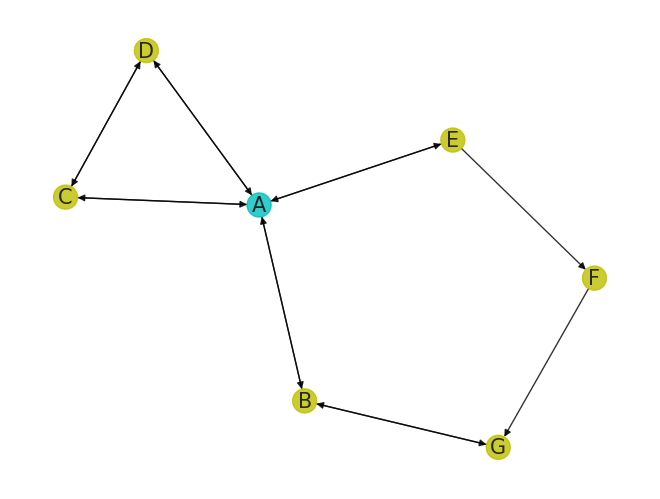

In [12]:
node2index = dict()
count = 0
for node in G.nodes:
    node2index[node] = count
    count += 1
colormap = []
[colormap.append('y') for nodes in G.nodes()]
colormap[node2index['A']] = 'c'
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Suppose a web surfer chooses random link is chosen and followed. The node color will indicate what site the surfer is on.

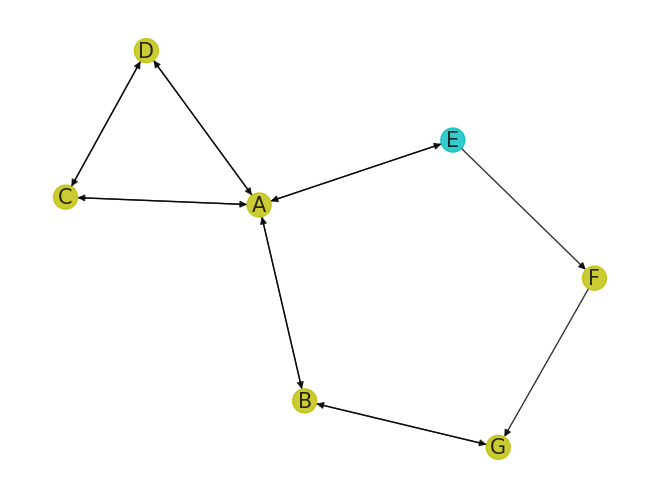

In [13]:
import numpy as np
colormap[node2index['A']] = 'y'
node = np.random.choice(list(G.neighbors('A')))
#print(node)
colormap[node2index[node]] = 'c'
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Let's repeat this a few times


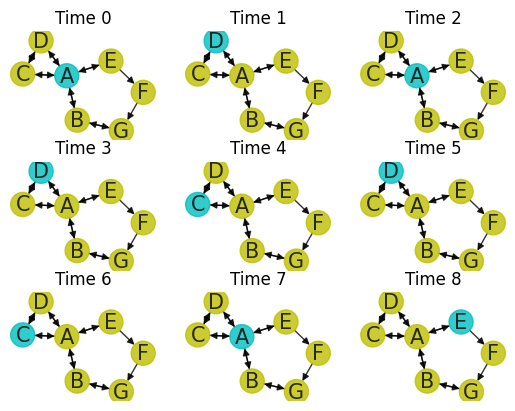

In [14]:
colormap = []
[colormap.append('y') for nodes in G.nodes()]
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
node = 'A'
for i in range(9):
    plt.subplot(3,3,i+1)
    title = "Time " + str(i)
    colormap[node2index[node]] = 'c'
    nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)
    plt.title(title)
    colormap[node2index[node]] = 'y'
    node = np.random.choice(list(G.neighbors(node)))
    

Run the cell above a few times and watch the surfer move to different websites.

Let's return to the equation

$$ x_i = \sum_{j=1}^n \frac{\tilde{A}_{ij}}{k_j^{\rm out}} x_j $$ 

Observe that $\frac{\tilde{A}_{ij}}{k_i^{\rm out}}$ can be thought of as the probability that the surfer will travel from node $i$ to node $j$, when each neighbor is equally probable. The numerator divides the transition probability from node $i$ among all of the neighbors equally, since out degree is the number of neighbors.

What if we do a lot of random walks, starting at random locations, and count the number of times that the surfer is at each node.

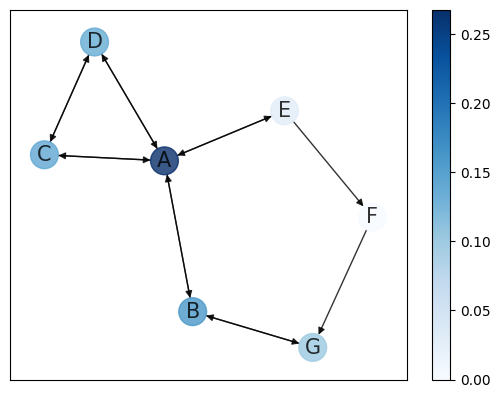

In [15]:
number_visits_dict = dict([(node,0) for node in list(G.nodes())])
total_nodes_visited = 0
for i in range(20): # 20 random walks
    node = np.random.choice(G.nodes)
    number_visits_dict[node] += 1
    total_nodes_visited += 1
    for j in range (30): # 30 steps in each random walk
        node = np.random.choice(list(G.neighbors(node)))
        number_visits_dict[node] += 1
        total_nodes_visited += 1
values = [number_visits_dict[node]/total_nodes_visited for node in number_visits_dict.keys()]
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = values, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=max(values)))
_ = plt.colorbar(sm, ax=plt.gca())

The darkness of the node represents the percentage of time that the surfer is at a particular site. Observe
  - The surfer spends the most time at node "A". That makes sense because that node is in the center of the network.
  - The surfer spends the last time at node "F". That makes sense because there is only one path to that node.
  - Node E has the second least time spent there. That makes sense because you can only reach node "E" from node "A".

Let's print out the normalized values of time spent at each node. For comparison, let's print out eigenvector centrality.

In [16]:
# Run a lot more
number_visits_dict = dict([(node,1.0/len(G.nodes)) for node in list(G.nodes())])
total_nodes_visited = 0
for i in range(200): # 20 random walks
    node = np.random.choice(G.nodes)
    number_visits_dict[node] += 1
    total_nodes_visited += 1
    for j in range (300): # 30 steps in each random walk
        node = np.random.choice(list(G.neighbors(node)))
        number_visits_dict[node] += 1
        total_nodes_visited += 1

c = nx.pagerank(G)
for node in sorted(number_visits_dict.keys()):
    print(f"node is {node}, percent visited is {number_visits_dict[node]/total_nodes_visited}, pagerank is {c[node]}")


node is A, percent visited is 0.27558376839107734, pagerank is 0.25141450125442744
node is B, percent visited is 0.20392263882297104, pagerank is 0.20592578749146978
node is C, percent visited is 0.13933792121499763, pagerank is 0.1301808049878132
node is D, percent visited is 0.137593735168486, pagerank is 0.1301808049878132
node is E, percent visited is 0.07144755576649264, pagerank is 0.0748538362353186
node is F, percent visited is 0.035351210251542475, pagerank is 0.05324166683687741
node is G, percent visited is 0.1367797816801139, pagerank is 0.15420259820628013


Notice how the values in the random walk are close to the pagerank values. This is not a coincidence.

Let's modify when we restart the random walk, and do it not after we reach a maximum walk duration but instead randomly. See minute 7 or so in the Stanford course.

In [17]:
# Run a lot more
number_visits_dict = dict([(node,1.0/len(G.nodes)) for node in list(G.nodes())])
total_nodes_visited = 0
beta = 0.85
node = np.random.choice(G.nodes)
for i in range(1000): # 200 random walks
    number_visits_dict[node] += 1
    total_nodes_visited += 1
    if len(list(G.neighbors(node))) == 0: # dead end
        node = np.random.choice(G.nodes) # if dead end, teleport/restart
    elif np.random.uniform() < beta: 
        node = np.random.choice(list(G.neighbors(node))) # choose random neighbor
    else: # spider traps
        node = np.random.choice(G.nodes) # restart/teleport to random node in graph
        

c = nx.pagerank(G)
for node in sorted(number_visits_dict.keys()):
    print(f"node is {node}, percent visited is {round(number_visits_dict[node]/total_nodes_visited,2)}, pagerank is {round(c[node],2)}")

node is A, percent visited is 0.25, pagerank is 0.25
node is B, percent visited is 0.22, pagerank is 0.21
node is C, percent visited is 0.12, pagerank is 0.13
node is D, percent visited is 0.11, pagerank is 0.13
node is E, percent visited is 0.07, pagerank is 0.07
node is F, percent visited is 0.06, pagerank is 0.05
node is G, percent visited is 0.17, pagerank is 0.15


Let's repeat for a different graph.

node is 0, percent visited is 0.12 , pagerank is 0.12
node is 1, percent visited is 0.05 , pagerank is 0.05
node is 2, percent visited is 0.03 , pagerank is 0.02
node is 3, percent visited is 0.03 , pagerank is 0.04
node is 4, percent visited is 0.01 , pagerank is 0.02
node is 5, percent visited is 0.02 , pagerank is 0.02
node is 6, percent visited is 0.03 , pagerank is 0.03
node is 7, percent visited is 0.01 , pagerank is 0.02
node is 8, percent visited is 0.02 , pagerank is 0.02
node is 9, percent visited is 0.02 , pagerank is 0.02
node is 10, percent visited is 0.04 , pagerank is 0.05
node is 11, percent visited is 0.06 , pagerank is 0.05
node is 12, percent visited is 0.2 , pagerank is 0.2
node is 13, percent visited is 0.18 , pagerank is 0.18
node is 14, percent visited is 0.18 , pagerank is 0.17


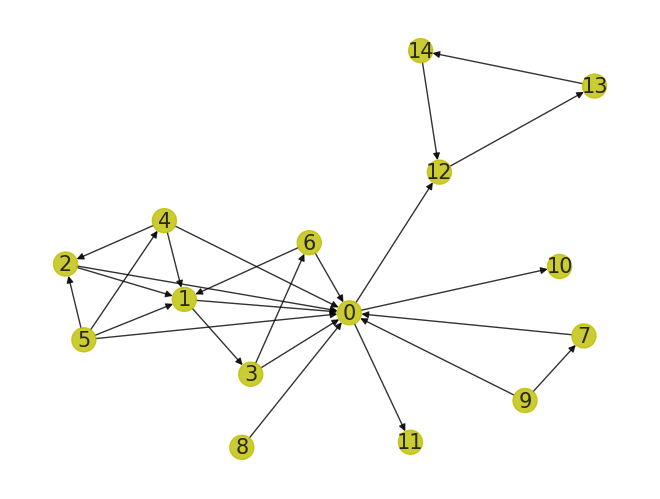

In [18]:
G = nx.DiGraph()
G.add_edges_from([(1,0),(1,3),
        (2,0),(2,1),
        (3,0),(3,6),
        (4,0),(4,1),(4,2),
        (5,0),(5,1),(5,2),(5,4),
        (6,0),(6,1),
        (7,0),
        (8,0),
        (9,0),(9,7),
        (0,11),(0,12),(0,10),
        (12,13),(13,14),(14,12)])
colormap = []
colormap = ['y' for node in G.nodes]
#print(node)
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

number_visits_dict = dict([(node,1.0/len(G.nodes)) for node in list(G.nodes())])
total_nodes_visited = 0
beta = 0.85
node = np.random.choice(G.nodes)
for i in range(1000): # 200 random walks
    number_visits_dict[node] += 1
    total_nodes_visited += 1
    if len(list(G.neighbors(node))) == 0: # dead end
        node = np.random.choice(G.nodes) # if dead end, teleport/restart
    elif np.random.uniform() < beta: 
        node = np.random.choice(list(G.neighbors(node))) # choose random neighbor
    else: # spider traps
        node = np.random.choice(G.nodes) # restart/teleport to random node in graph
        

c = nx.pagerank(G)
for node in sorted(number_visits_dict.keys()):
    print(f"node is {node}, percent visited is {np.round(number_visits_dict[node]/total_nodes_visited,2)} , pagerank is {np.round(c[node],2)}")

---



#### Power Iteration

Rather than doing a bunch of random walks, there is an algorithm that we an use which falls somewhere between solving PageRank as an eigenvector problem and solving PageRank using pure random walks. 

The approach seeks to directly implement the equation

$$ x_i = \sum_{j=1}^n \frac{\tilde{A}_{ij}}{k_j^{\rm out}} x_j $$

but with a different interpretation of the variable $x_j$. When we introduced eigenvector centrality and PageRank, we interpreted $x_j$ as the centrality score. Now that we know that the centrality score is the same as the percentage of time a random walk dwells on a node we can interpret $x_j$ as the probability that the random walk will be at node $j$ at any given time. To explain this, let's return to one of the networks we used earlier.


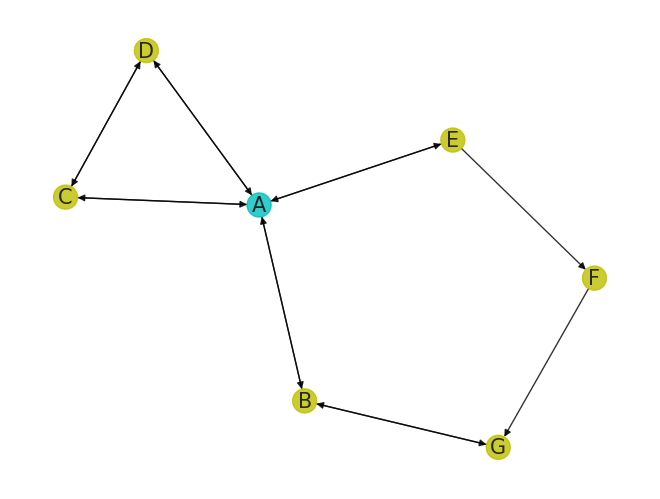

In [19]:
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D','E','F','G']) # Note that this is an ordered list 
G.add_edges_from({('A','C'),('C','A'),
                  ('A','D'),('D','A'),
                  ('D','C'),('C','D'),
                  ('A','E'),('E','A'),
                  ('A','B'), ('B','A'),
                  ('B','G'), ('G','B'),
                  ('E','F'),('F','G')})
colormap = []
[colormap.append('y') for nodes in G.nodes()]
colormap[0] = 'c'
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Let's inspect the adjacency matrix. Pay attention to the fifth row and fifth column because those correspond to vertex "E". Vertex "E" is important because it is the only vertex whose out degree differs from its in degree.

In [20]:
A = nx.linalg.adjacency_matrix(G).toarray()
A_tilde = np.transpose(A)
#print(A_tilde)

Let's show that dividing $\tilde{A}_{ij}$ by $k_j^{\rm out}$ is equivalent to multiplying $\tilde{A}$ by the inverse of the degree matrix $D^{-1}$ to get $\tilde{A}D^{-1}$. Recall that the degree matrix is the diagonal matrix with zeroes everywhere except the diagonal, and the values on the diagonal represent the out-degree for the node represented by that row.

In [21]:
out_degrees = A_tilde.sum(axis=0) # column computes out degrees
#print(out_degrees)
D = np.diag(out_degrees)
print(D)

[[4 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


Let's inspect and interpret $\tilde{A}D^{-1}$

In [22]:
print(A_tilde@np.linalg.inv(D))

[[0.   0.5  0.5  0.5  0.5  0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   1.  ]
 [0.25 0.   0.   0.5  0.   0.   0.  ]
 [0.25 0.   0.5  0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.   1.   0.  ]]


Notice how the sum of each column equals one. Matrices that have this property are called _column stochastic_. That's a fancy way of saying that each column represents something random so the values in the row should be probabilities and sum to one. In our context, the probabilities represent the probability of transitioning from the column vertex to one of the row vertices given that there is an edge from column vertex to row vertex. Each row vertex adjacent from the column vertex gets an equal share.

If you don't understand those two paragraphs that's ok because we can illustrate what they mean with an example. Suppose that our random walk begins at node "B". The probability of being at any vertex is given by the column vector $x = [0,1,0,0,0,0,0]^T$. Let's look at whan happens to $x$ when we multiply it by $\tilde{A}D^{-1} = [0.5,0,0,0,0,0,0.5]^T$.

In [23]:
x = np.array([[0],[1],[0],[0],[0],[0],[0]])
print(A_tilde@np.linalg.inv(D)@x)

[[0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]]


Let's add shading to the graph to represent how the random walk moves from "certainly at node B" to "half the time at node A and half the time at node G".

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


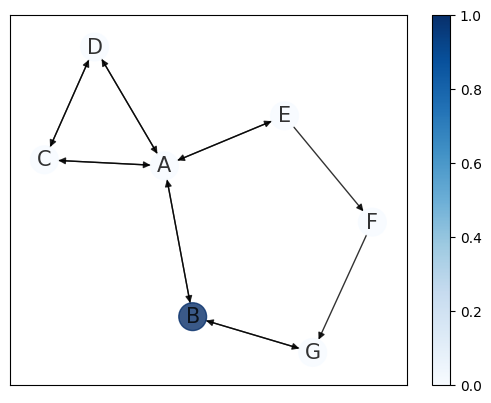

In [24]:
x = np.array([[0],[1],[0],[0],[0],[0],[0]]) 
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = x, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=1))
_ = plt.colorbar(sm, ax=plt.gca())
print(x)

This means that if we start at vertex "B" and do a random walk, half the time we'll find ourselves at vertex "A" (first row) and vertex "G" (last row). 


[[0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]]


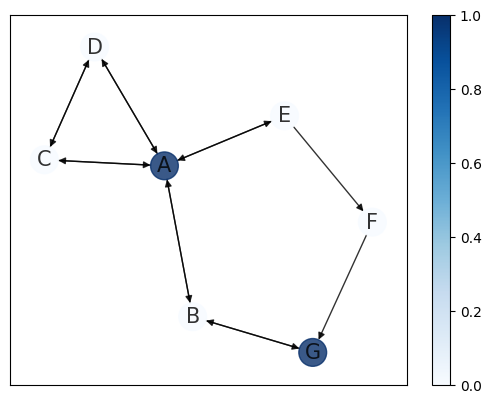

In [25]:
x = A_tilde@np.linalg.inv(D)@x
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = x, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=1))
_ = plt.colorbar(sm, ax=plt.gca())
print(x)



If we multiply by $\tilde{A}D^{-1}$ again, we get

$$ (\tilde{A}D^{-1})(\tilde{A}D^{-1}x) = [0, 0.625, 0.125, 0.125, 0.125, 0, 0]$$

which equals the probability of being at any node given that we started at vertex "B" and took two random steps.

[[0.   ]
 [0.625]
 [0.125]
 [0.125]
 [0.125]
 [0.   ]
 [0.   ]]


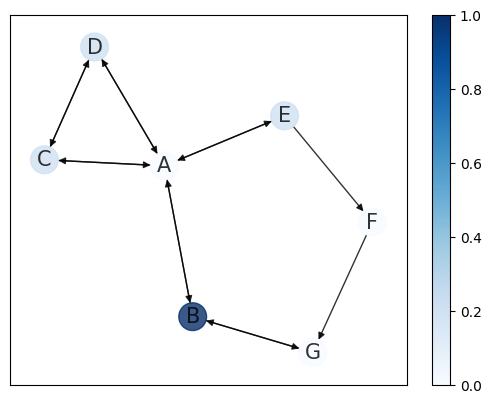

In [26]:
x = A_tilde@np.linalg.inv(D)@x
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = x, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=1))
_ = plt.colorbar(sm, ax=plt.gca())
print(x)

The power iteration algorithm just does this a bunch. Let's assume that we start with equal probability at any vertex and multiply this probability by $\tilde{A}D^{-1}$ until the probability stops changing.

[[0.27581911]
 [0.20692775]
 [0.13793901]
 [0.13793901]
 [0.06897978]
 [0.03447321]
 [0.13792213]]


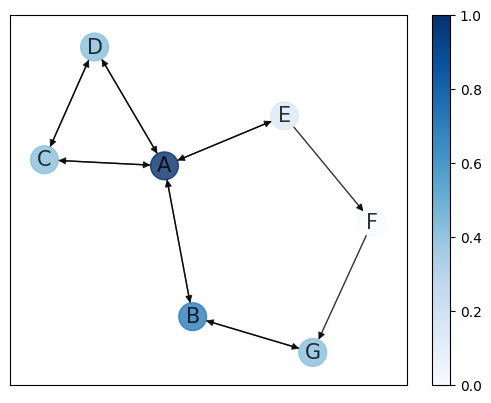

In [27]:
num_nodes = len(list(G.nodes))
x = np.ones([num_nodes,1])/num_nodes
small_enough_change = False
while not small_enough_change:
    x_next = A_tilde@np.linalg.inv(D)@x
    if np.max(x_next-x) < 0.0001:
        small_enough_change = True
    x = x_next
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = x, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=1))
_ = plt.colorbar(sm, ax=plt.gca())
print(x)

Let's compare the values on this random walk to PageRank values

node is A, percent visited is [0.28] , pagerank is 0.25
node is B, percent visited is [0.21] , pagerank is 0.21
node is C, percent visited is [0.14] , pagerank is 0.13
node is D, percent visited is [0.14] , pagerank is 0.13
node is E, percent visited is [0.07] , pagerank is 0.07
node is F, percent visited is [0.03] , pagerank is 0.05
node is G, percent visited is [0.14] , pagerank is 0.15


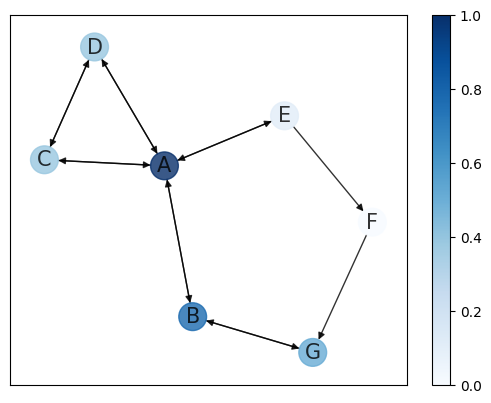

In [28]:
c = nx.pagerank(G)
nodes = list(G.nodes)
for i in range(len(nodes)):
    print(f"node is {nodes[i]}, percent visited is {np.round(x[i],2)} , pagerank is {np.round(c[nodes[i]],2)}")
c = list(c.values())
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = c, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=1))
_ = plt.colorbar(sm, ax=plt.gca())

They are close, but not quite the same. The problem is that the Random walks in Page Rank are a little more nuanced than just doing straightforward random walks. 

--- 

#### Random Walk with Restarts

Consider the following network that we played with before.


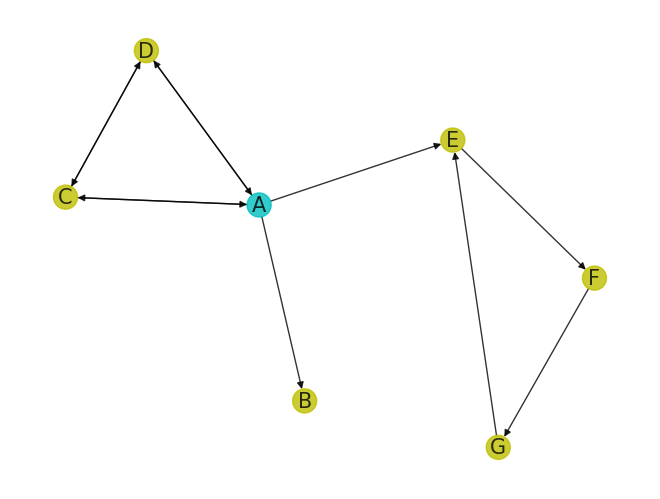

In [29]:
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D','E','F','G']) # Note that this is an ordered list 
G.add_edges_from({('A','C'),('C','A'),
                  ('A','D'),('D','A'),
                  ('D','C'),('C','D'),
                  ('A','E'),
                  ('A','B'),
                  ('G','E'),
                  ('E','F'),('F','G')})
colormap = []
[colormap.append('y') for nodes in G.nodes()]
colormap[0] = 'c'
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

What happens if my random walk takes me to node 10 or node 11? I never leave. And what happens if my random walk takes me to node 12? I just keep circling between from node 12 to 13 to 14 and back to 12.  Leskovec calls these "dead ends" and "spider traps", respectively [see minute 1:19](https://www.youtube.com/watch?v=rK2ZBmQHVVs). Dead ends have one solution, and spider traps another.

---


#### Solving the Dead End Problem: Transition Matrix

We have been using the equation $x = \tilde{A} D^{-1} x$ as a way of describing random walks on a network, but when the network has dead ends then $\tilde{A} D^{-1}$ isn't defined. Let's look at the row from matrix $D$ for vertex 10 in the graph above. Notice that is all zeros, which follows because the out degree of node 10 is zero. When a matrix has a row of all zeroes, it can't be inverted, which we can check by looking at the rank of matrix $D$. And since $D$ can't be inverted, we can't compute $\tilde{A}D^{-1}$.

In [30]:
A = nx.linalg.adjacency_matrix(G)
A_tilde = np.transpose(A)
degrees = A_tilde.sum(axis=0) # column sum
D = np.diag(degrees)
print(D)
print(f"There are {len(G.nodes)} nodes in the graph but the rank of D is {np.linalg.matrix_rank(D)}")

[[4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
There are 7 nodes in the graph but the rank of D is 6


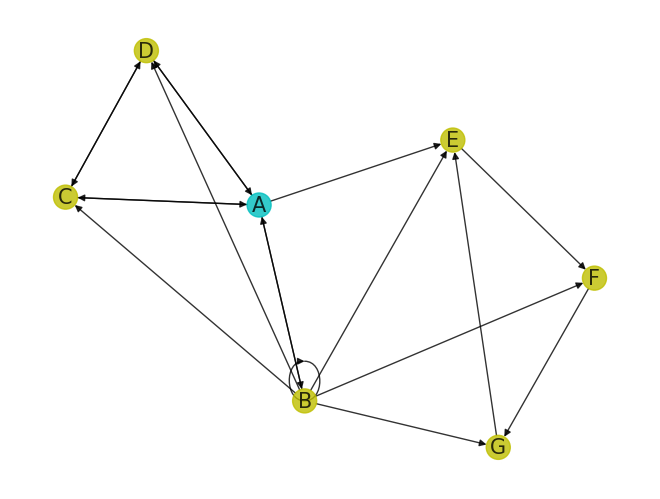

In [31]:
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D','E','F','G']) # Note that this is an ordered list 
G.add_edges_from({('A','C'),('C','A'),
                  ('A','D'),('D','A'),
                  ('D','C'),('C','D'),
                  ('A','E'),
                  ('A','B'),
                  ('G','E'),
                  ('E','F'),('F','G'),
                  ('B','A'),('B','B'),('B','C'),('B','D'),('B','E'),('B','F'),('B','G')})
colormap = []
[colormap.append('y') for nodes in G.nodes()]
colormap[0] = 'c'
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

The solution is to construct a matrix which we'll call $M$ from the formula 

$$ \frac{A_{ij}}{k_j^{\rm out}} $$

but in such a way that we never get stuck at a dead end (more technically called a _sink_). The easiest way to do this is to add an edge from the dead end to every node in the network. This is equivalent to setting all values in the column for a dead end node to $1/n$.

In [32]:
A = nx.linalg.adjacency_matrix(G).toarray()
A_tilde = np.transpose(A)
degrees = A_tilde.sum(axis=0) # column sum
D_tilde = np.diag(degrees)
print(D)
print(A_tilde@np.linalg.inv(D_tilde))

[[4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
[[0.         0.14285714 0.5        0.5        0.         0.
  0.        ]
 [0.25       0.14285714 0.         0.         0.         0.
  0.        ]
 [0.25       0.14285714 0.         0.5        0.         0.
  0.        ]
 [0.25       0.14285714 0.5        0.         0.         0.
  0.        ]
 [0.25       0.14285714 0.         0.         0.         0.
  1.        ]
 [0.         0.14285714 0.         0.         1.         0.
  0.        ]
 [0.         0.14285714 0.         0.         0.         1.
  0.        ]]


That takes care of dead ends by causing random jumps to other nodes whenever a dead end occurs.

---

#### Solving the Spider Trap by Teleporting

The solution to spider traps is to randomly "teleport" to a different node every now and then [see minute 12:30](https://www.youtube.com/watch?v=rK2ZBmQHVVs). This gets you out the spider trap. Randomly teleporting can also be implemented by creating a column stochastic matrix that goes to any other node with probability $1/n$, where $n$ is the number of nodes in the graph. Let's call this graph $P$ for telePort. 

In [33]:
num_nodes = len(G.nodes)
P = np.ones((num_nodes,num_nodes))/num_nodes
print(P.sum(axis=0))  # Check column stochasticity


[1. 1. 1. 1. 1. 1. 1.]


#### Blending teleports with random restarts

We can blend this with the $M$ and keep everything by a probability by multiplying by doing a weighted sum

$$ T = \beta M + (1-\beta) P $$

and then do the power iteration algorithm using matrix $T$. 

There's a little "gotcha". You can't compute the inverse of $D$ for the network above because some of the columns are zero (nodes 10 and 11 have no outdegree), so you have to construct the probabilities a little differently.

In [34]:
# Doesn't work! TODO: fix this
beta = 0.85
T = beta*M + (1-beta)* P
#print(Q.sum(axis=1)) # Check to see if still column stochastic
#print(P.sum(axis=1)) # Check to see if still column stochastic
#print(M.sum(axis=1)) # Check to see if still column stochastic

## Power iteration
num_nodes = len(list(G.nodes))
x = np.ones([num_nodes,1])/num_nodes
small_enough_change = False
while not small_enough_change:
    x_next = T@x
    #x_next = 0.85*Q@x + np.ones_like(x); x_next = x_next/np.sum(x_next)
    if np.max(x_next-x) < 1e-8:
        small_enough_change = True
    x = x_next

## page rank
c = nx.pagerank(G)
print(nodes)
for i in range(len(nodes)):
    print(f"node is {nodes[i]}, percent visited is {np.round(x[i],2)} , pagerank is {np.round(c[nodes[i]],2)}")

['A', 'B', 'C', 'D', 'E', 'F', 'G']
node is A, percent visited is [0.25] , pagerank is 0.1
node is B, percent visited is [0.21] , pagerank is 0.05
node is C, percent visited is [0.13] , pagerank is 0.08
node is D, percent visited is [0.13] , pagerank is 0.08
node is E, percent visited is [0.07] , pagerank is 0.24
node is F, percent visited is [0.05] , pagerank is 0.23
node is G, percent visited is [0.15] , pagerank is 0.22


#### The Power Iteration Algorithm

```
x = 1/n
while True:
    y = Mx
    if norm(x-y) < tolerance: break
    x = y
```

---

##### Conclusion

We can interpret Page Rank either as a linear algebra problem or a Random Walk with teleports and random restarts. Both yield the same value. When we were doing the linear algebra problem, we set $\beta$ to $(1-\alpha)/n$. That effectually implemented random restarts. We'd have to make one more change to solve the linear algebra problem, and that is to redefine the degree matrix.